In [5]:
import psycopg2
from matplotlib import pyplot as plt

In [11]:
##CREATE DATABASE NAMED BOOKSTORE##
conn = psycopg2.connect(database = 'postgres', user = 'postgres', password = '1234', host = 'localhost', port = '5432')

conn.autocommit = True

cursor = conn.cursor()

create_db = '''CREATE database bookstore'''

cursor.execute(create_db)


print('Database Created....')

conn.close()

Database Created....


In [12]:
##Check to see if the connection is succesful

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')

print("The connection is Successful")

The connection is Successful


In [13]:
#Add Employee Table

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')

cursor = conn.cursor()


cursor.execute("DROP TABLE IF EXISTS Employee")


sql_table_emp = '''CREATE TABLE Employee(
    EMPLOYEE_ID INT NOT NULL,
    FIRST_NAME CHAR(20) NOT NULL,
    LAST_NAME CHAR(20) NOT NULL,
    YEARS_TENURED INT NOT NULL,
    ROLE CHAR(20) NOT NULL,
    HOURLY_PAY INT NOT NULL)'''

cursor.execute(sql_table_emp)

conn.commit()

conn.close()

In [14]:
#Add Customer Table

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')

cursor = conn.cursor()


cursor.execute("DROP TABLE IF EXISTS Customer")


sql_table_cust = '''CREATE TABLE Customer(
    Customer_ID INT NOT NULL,
    FIRST_NAME CHAR(20) NOT NULL,
    LAST_NAME CHAR(20) NOT NULL,
    EMAIL VARCHAR(70),
    MONTH_OF_BIRTH INT NOT NULL,
    DAY_OF_BIRTH INT NOT NULL,
    YEAR_OF_BIRTH INT NOT NULL,
    AGE INT NOT NULL)'''

cursor.execute(sql_table_cust)

conn.commit()

conn.close()

In [15]:
#Add Book Table
conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')

cursor = conn.cursor()


cursor.execute("DROP TABLE IF EXISTS Books")


sql_table_books = '''CREATE TABLE Books(
    Book_ID INT NOT NULL,
    Book_TITLE CHAR(40) NOT NULL,
    AUTHOR_FIRST_NAME CHAR(20) NOT NULL,
    AUTHOR_LAST_NAME CHAR(20) NOT NULL,
    GENRE CHAR(70),
    PRICE INT NOT NULL)'''

cursor.execute(sql_table_books)

conn.commit()

conn.close()

In [16]:
#Add Order Table

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')

cursor = conn.cursor()


cursor.execute("DROP TABLE IF EXISTS Order_T")

sql_table_order = '''CREATE TABLE Order_T(
    PURCHASE_ID INT NOT NULL,
    BOOK_ID INT NOT NULL,
    EMPLOYEE_ID INT NOT NULL,
    CUSTOMER_ID INT NOT NULL,
    PURCHASE_AMOUNT INT NOT NULL,
    BOOK_TITLE char(40) NOT NULL,
    DATE_OF_PURCHASE INT NOT NULL,
    MONTH_OF_PURCHASE CHAR(9) NOT NULL,
    YEAR_OF_PURCHASE INT NOT NULL,
    MONTH_NUMBER INT NOT NULL)'''

cursor.execute(sql_table_order)

conn.commit()

conn.close()

In [17]:
#Insert values to Employee Table

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()

statement = "INSERT INTO Employee (EMPLOYEE_ID,FIRST_NAME,LAST_NAME,YEARS_TENURED,ROLE,HOURLY_PAY) VALUES (%s,%s,%s,%s,%s,%s)"
data = [(1,'Lexie','Dickson',12,'Manager',27),
(2,'Ibrahim','Edwards',2,'Cashier',15),
(3,'Valentin','Gonzales',1,'Cashier',15),
(4,'Jaidyn','Mcgarth',4,'Stocker',17),
(5,'Kody','Blackburn',7,'Stocker',20)]

cursor.executemany(statement,data)



retrieve_data = '''SELECT * from Employee'''

cursor.execute(retrieve_data)
result = cursor.fetchall()
for row in result:
    print(row)

conn.commit()
conn.close()


(1, 'Lexie               ', 'Dickson             ', 12, 'Manager             ', 27)
(2, 'Ibrahim             ', 'Edwards             ', 2, 'Cashier             ', 15)
(3, 'Valentin            ', 'Gonzales            ', 1, 'Cashier             ', 15)
(4, 'Jaidyn              ', 'Mcgarth             ', 4, 'Stocker             ', 17)
(5, 'Kody                ', 'Blackburn           ', 7, 'Stocker             ', 20)


In [18]:
#Insert values to Customer Table

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()

statement = "INSERT INTO Customer (CUSTOMER_ID,FIRST_NAME,LAST_NAME,EMAIL,MONTH_OF_BIRTH,DAY_OF_BIRTH,YEAR_OF_BIRTH,AGE) VALUES (%s,%s,%s,%s,%s,%s,%s,%s)"
data = [(101,'Karley','Massey','KarleyMassey5@gmail.com',1,27,1994,27),(102,'Mylee','Spears','MyleeSpears114@gmail.com',2,4,1990,31),(103,'Marcel','Shea','MarcelShea14@gmail.com',7,25,1996,25),
(104,'Jordon','Zimmerman','JordonZimmerman94@gmail.com',7,15,1988,33),(105,'Autumn','Lewis','AutumnLewis54@gmail.com',10,14,1999,22),
(106,'Amy','Boyd','AmyBoyd113@gmail.com',11,27,1985,36),(107,'Rachael','Cisneros','RachaelCisneros8@gmail.com',7,23,1998,23),(108,'Kyler','Fritz','KylerFritz111@gmail.com',4,13,1989,32),
(109,'Cortez','Mays','CortezMays83@gmail.com',6,17,1973,48),(110,'Esteban','Cain','EstebanCain13@gmail.com',5,20,1977,44),(111,'Santos','Mcmahon','SantosMcmahon0@gmail.com',4,12,2000,21),
(112,'Tabitha','Collier','TabithaCollier122@gmail.com',8,9,1989,32),(113,'Olivia','Franklin','OliviaFranklin1@gmail.com',3,10,1988,33),
(114,'Adalyn','Mcdowell','AdalynMcdowell81@gmail.com',5,3,1999,22),(115,'Felipe','Cantrell','FelipeCantrell78@gmail.com',8,14,1976,45),
(116,'Monique','Monreno','MoniqueMonreno73@gmail.com',2,12,1985,36),(117,'Ammanuel','York','AmmanuelYork16@gmail.com',11,16,1977,44),
(118,'Yahir','Collins','YahirCollins60@gmail.com',8,18,1993,28),(119,'Nataly','Mccarty','NatalyMccarty99@gmail.com',11,1,1995,26)
]

cursor.executemany(statement,data)

retrieve_data = '''SELECT * from Customer'''

cursor.execute(retrieve_data)
result = cursor.fetchall()
for row in result:
    print(row)

conn.commit()
conn.close()

(101, 'Karley              ', 'Massey              ', 'KarleyMassey5@gmail.com', 1, 27, 1994, 27)
(102, 'Mylee               ', 'Spears              ', 'MyleeSpears114@gmail.com', 2, 4, 1990, 31)
(103, 'Marcel              ', 'Shea                ', 'MarcelShea14@gmail.com', 7, 25, 1996, 25)
(104, 'Jordon              ', 'Zimmerman           ', 'JordonZimmerman94@gmail.com', 7, 15, 1988, 33)
(105, 'Autumn              ', 'Lewis               ', 'AutumnLewis54@gmail.com', 10, 14, 1999, 22)
(106, 'Amy                 ', 'Boyd                ', 'AmyBoyd113@gmail.com', 11, 27, 1985, 36)
(107, 'Rachael             ', 'Cisneros            ', 'RachaelCisneros8@gmail.com', 7, 23, 1998, 23)
(108, 'Kyler               ', 'Fritz               ', 'KylerFritz111@gmail.com', 4, 13, 1989, 32)
(109, 'Cortez              ', 'Mays                ', 'CortezMays83@gmail.com', 6, 17, 1973, 48)
(110, 'Esteban             ', 'Cain                ', 'EstebanCain13@gmail.com', 5, 20, 1977, 44)
(111, 'Santos   

In [19]:
#Insert values to Book Table

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()

statement = "INSERT INTO Books (BOOK_ID,BOOK_TITLE,AUTHOR_FIRST_NAME,AUTHOR_LAST_NAME,GENRE,PRICE) VALUES (%s,%s,%s,%s,%s,%s)"
data = [(1000,'DaVinci Code','Dan','Brown','Crime',15),(1001,'DaVinci Code','Dan','Brown','Crime',15),(1002,'DaVinci Code','Dan','Brown','Crime',15),
(1003,'DaVinci Code','Dan','Brown','Crime',15),(1004,'DaVinci Code','Dan','Brown','Crime',15),(1005,'DaVinci Code','Dan','Brown','Crime',15),(1006,'DaVinci Code','Dan','Brown','Crime',15),(1007,'DaVinci Code','Dan','Brown','Crime',15),(1008,'DaVinci Code','Dan','Brown','Crime',15),(1009,'DaVinci Code','Dan','Brown','Crime',15),(1010,'DaVinci Code','Dan','Brown','Crime',15),(1011,'Harry Potter','JK','Rowling','Wizards',10),(1012,'Harry Potter','JK','Rowling','Wizards',10),(1013,'Harry Potter','JK','Rowling','Wizards',10),(1014,'Harry Potter','JK','Rowling','Wizards',10),(1015,'Harry Potter','JK','Rowling','Wizards',10),(1016,'Harry Potter','JK','Rowling','Wizards',10),(1017,'Harry Potter','JK','Rowling','Wizards',10),(1018,'Harry Potter','JK','Rowling','Wizards',10),(1019,'Harry Potter','JK','Rowling','Wizards',10),(1020,'Harry Potter','JK','Rowling','Wizards',10),(1021,'Fifty Shades of Grey','EL','James','Romance',25),(1022,'Fifty Shades of Grey','EL','James','Romance',25),(1023,'Fifty Shades of Grey','EL','James','Romance',25),(1024,'Fifty Shades of Grey','EL','James','Romance',25),(1025,'Fifty Shades of Grey','EL','James','Romance',25),
(1026,'Fifty Shades of Grey','EL','James','Romance',25),(1027,'Fifty Shades of Grey','EL','James','Romance',25),(1028,'Twilight','Stephenie','Meyer','Young Adult',12),
(1029,'Twilight','Stephenie','Meyer','Young Adult',12),(1030,'Twilight','Stephenie','Meyer','Young Adult',12),(1031,'Twilight','Stephenie','Meyer','Young Adult',12),
(1032,'Twilight','Stephenie','Meyer','Young Adult',12),(1033,'Twilight','Stephenie','Meyer','Young Adult',12),(1034,'Twilight','Stephenie','Meyer','Young Adult',12),
(1035,'Twilight','Stephenie','Meyer','Young Adult',12),(1036,'Twilight','Stephenie','Meyer','Young Adult',12),(1037,'Twilight','Stephenie','Meyer','Young Adult',12),
(1038,'Twilight','Stephenie','Meyer','Young Adult',12),(1039,'Twilight','Stephenie','Meyer','Young Adult',12),(1040,'Twilight','Stephenie','Meyer','Young Adult',12),
(1041,'The Lost Symbol','Dan','Brown','Crime',15),(1042,'The Lost Symbol','Dan','Brown','Crime',15),(1043,'The Lost Symbol','Dan','Brown','Crime',15),
(1044,'The Lost Symbol','Dan','Brown','Crime',15),(1045,'The Lost Symbol','Dan','Brown','Crime',15),(1046,'The Lost Symbol','Dan','Brown','Crime',15),
(1047,'The Lost Symbol','Dan','Brown','Crime',15),(1048,'The Lost Symbol','Dan','Brown','Crime',15),(1049,'The Lost Symbol','Dan','Brown','Crime',15),
(1050,'Pride and Prejudice','Jane ','Austen','Romance',5),(1051,'Pride and Prejudice','Jane ','Austen','Romance',5),(1052,'Pride and Prejudice','Jane ','Austen','Romance',5),
(1053,'Pride and Prejudice','Jane ','Austen','Romance',5),(1054,'Pride and Prejudice','Jane ','Austen','Romance',5),(1055,'Pride and Prejudice','Jane ','Austen','Romance',5),
(1056,'Pride and Prejudice','Jane ','Austen','Romance',5),(1057,'Pride and Prejudice','Jane ','Austen','Romance',5),(1058,'Pride and Prejudice','Jane ','Austen','Romance',5),
(1059,'Pride and Prejudice','Jane ','Austen','Romance',5),(1060,'Pride and Prejudice','Jane ','Austen','Romance',5),(1061,'Pride and Prejudice','Jane ','Austen','Romance',5),
(1062,'Pride and Prejudice','Jane ','Austen','Romance',5),(1063,'Pride and Prejudice','Jane ','Austen','Romance',5),(1064,'Pride and Prejudice','Jane ','Austen','Romance',5),
(1065,'Hunger Games','Suzanne','Collins','Young Adult',11),(1066,'Hunger Games','Suzanne','Collins','Young Adult',11),(1067,'Hunger Games','Suzanne','Collins','Young Adult',11),
(1068,'Hunger Games','Suzanne','Collins','Young Adult',11),(1069,'Hunger Games','Suzanne','Collins','Young Adult',11),(1070,'Hunger Games','Suzanne','Collins','Young Adult',11),
(1071,'Hunger Games','Suzanne','Collins','Young Adult',11),(1072,'Hunger Games','Suzanne','Collins','Young Adult',11),(1073,'Hunger Games','Suzanne','Collins','Young Adult',11),
(1075,'Hunger Games','Suzanne','Collins','Young Adult',11),(1074,'Hunger Games','Suzanne','Collins','Young Adult',11),(1076,'Hunger Games','Suzanne','Collins','Young Adult',11),
(1077,'Hunger Games','Suzanne','Collins','Young Adult',11),(1078,'Spirit Mage','Layton','Greene','Wizards',7),(1079,'Spirit Mage','Layton','Greene','Wizards',7),
(1080,'Spirit Mage','Layton','Greene','Wizards',7),(1081,'Spirit Mage','Layton','Greene','Wizards',7),(1082,'Spirit Mage','Layton','Greene','Wizards',7),
(1083,'Spirit Mage','Layton','Greene','Wizards',7),(1084,'Spirit Mage','Layton','Greene','Wizards',7),(1085,'Spirit Mage','Layton','Greene','Wizards',7),
(1086,'Spirit Mage','Layton','Greene','Wizards',7),(1087,'Spirit Mage','Layton','Greene','Wizards',7),(1088,'Spirit Mage','Layton','Greene','Wizards',7),
(1089,'Spirit Mage','Layton','Greene','Wizards',7),(1090,'Spirit Mage','Layton','Greene','Wizards',7),(1091,'Spirit Mage','Layton','Greene','Wizards',7),
(1092,'Spirit Mage','Layton','Greene','Wizards',7)
]

cursor.executemany(statement,data)

retrieve_data = '''SELECT * from Books'''

cursor.execute(retrieve_data)
result = cursor.fetchall()
for row in result:
    print(row)

conn.commit()
conn.close()

(1000, 'DaVinci Code                            ', 'Dan                 ', 'Brown               ', 'Crime                                                                 ', 15)
(1001, 'DaVinci Code                            ', 'Dan                 ', 'Brown               ', 'Crime                                                                 ', 15)
(1002, 'DaVinci Code                            ', 'Dan                 ', 'Brown               ', 'Crime                                                                 ', 15)
(1003, 'DaVinci Code                            ', 'Dan                 ', 'Brown               ', 'Crime                                                                 ', 15)
(1004, 'DaVinci Code                            ', 'Dan                 ', 'Brown               ', 'Crime                                                                 ', 15)
(1005, 'DaVinci Code                            ', 'Dan                 ', 'Brown               ', 'Crime          

In [20]:
#Insert Values to Order Table

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()

statement = "INSERT INTO Order_T (PURCHASE_ID,BOOK_ID,EMPLOYEE_ID,CUSTOMER_ID,PURCHASE_AMOUNT,BOOK_TITLE,DATE_OF_PURCHASE,MONTH_OF_PURCHASE,YEAR_OF_PURCHASE,MONTH_NUMBER) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
data = [(9000,1090,5,113,7,'Spirit Mage',2,'July',2021,7),(9001,1025,5,117,25,'Fifty Shades of Grey',20,'April',2021,4),(9002,1084,5,111,7,'Spirit Mage',9,'November',2021,11),
(9003,1000,3,101,15,'DaVinci Code',7,'January',2021,1),(9004,1019,3,110,10,'Harry Potter',5,'May',2021,5),(9005,1068,2,110,11,'Hunger Games',17,'November',2021,11),(9006,1045,1,106,15,'The Lost Symbol',8,'April',2021,4),
(9007,1024,2,109,25,'Fifty Shades of Grey',15,'December',2021,12),(9008,1065,3,119,11,'Hunger Games',21,'July',2021,7),(9009,1013,5,118,10,'Harry Potter',22,'August',2021,8),
(9010,1036,5,102,12,'Twilight',23,'September',2021,9),(9011,1087,3,112,7,'Spirit Mage',6,'November',2021,11),(9012,1002,5,112,15,'DaVinci Code',9,'September',2021,9),
(9013,1080,2,104,7,'Spirit Mage',16,'June',2021,6),(9014,1026,5,116,25,'Fifty Shades of Grey',9,'July',2021,7),(9015,1035,4,107,12,'Twilight',8,'April',2021,4),
(9016,1083,3,114,7,'Spirit Mage',10,'October',2021,10),(9017,1040,3,102,12,'Twilight',7,'August',2021,8),(9018,1075,3,103,11,'Hunger Games',3,'January',2021,1),
(9019,1077,3,106,11,'Hunger Games',6,'November',2021,11),(9020,1056,2,102,5,'Pride and Prejudice',8,'September',2021,9),(9021,1020,4,112,10,'Harry Potter',9,'February',2021,2),
(9022,1007,1,102,15,'DaVinci Code',13,'November',2021,11),(9023,1016,4,117,10,'Harry Potter',5,'March',2021,3),(9024,1018,2,119,10,'Harry Potter',25,'February',2021,2),
(9025,1060,2,111,5,'Pride and Prejudice',5,'May',2021,5),(9026,1062,5,112,5,'Pride and Prejudice',5,'March',2021,3),(9027,1066,1,109,11,'Hunger Games',6,'May',2021,5),
(9028,1072,3,116,11,'Hunger Games',18,'March',2021,3),(9029,1010,5,104,15,'DaVinci Code',24,'October',2021,10),(9030,1048,4,110,15,'The Lost Symbol',18,'June',2021,6),
(9031,1034,3,107,12,'Twilight',3,'October',2021,10),(9032,1047,1,117,15,'The Lost Symbol',15,'September',2021,9),(9033,1009,2,108,15,'DaVinci Code',17,'July',2021,7),
(9034,1003,2,102,15,'DaVinci Code',17,'November',2021,11),(9035,1055,5,108,5,'Pride and Prejudice',4,'February',2021,2),(9036,1059,4,105,5,'Pride and Prejudice',9,'February',2021,2),
(9037,1043,3,116,15,'The Lost Symbol',20,'July',2021,7),(9038,1005,3,101,15,'DaVinci Code',28,'January',2021,1),(9039,1069,4,119,11,'Hunger Games',18,'March',2021,3),
(9040,1046,3,114,15,'The Lost Symbol',19,'March',2021,3),(9041,1001,4,110,15,'DaVinci Code',18,'February',2021,2),(9042,1063,4,104,5,'Pride and Prejudice',22,'April',2021,4),
(9043,1023,1,102,25,'Fifty Shades of Grey',22,'January',2021,1),(9044,1076,4,103,11,'Hunger Games',20,'July',2021,7),(9045,1021,5,116,25,'Fifty Shades of Grey',27,'January',2021,1),
(9046,1015,1,118,10,'Harry Potter',24,'April',2021,4),(9047,1008,2,106,15,'DaVinci Code',4,'February',2021,2),(9048,1014,5,103,10,'Harry Potter',4,'February',2021,2),
(9049,1039,2,116,12,'Twilight',13,'January',2021,1),(9050,1061,1,105,5,'Pride and Prejudice',8,'June',2021,6),(9051,1058,5,113,5,'Pride and Prejudice',16,'April',2021,4),
(9052,1042,3,118,15,'The Lost Symbol',5,'June',2021,6),(9053,1006,3,119,15,'DaVinci Code',28,'March',2021,3),(9054,1044,4,111,15,'The Lost Symbol',13,'March',2021,3),
(9055,1033,1,105,12,'Twilight',11,'May',2021,5),(9056,1038,5,107,12,'Twilight',19,'December',2021,12),(9057,1064,5,107,5,'Pride and Prejudice',27,'March',2021,3),
(9058,1086,5,118,7,'Spirit Mage',2,'September',2021,9),(9059,1074,5,110,11,'Hunger Games',13,'March',2021,3)
]

cursor.executemany(statement,data)

retrieve_data = '''SELECT * from Order_T'''

cursor.execute(retrieve_data)
result = cursor.fetchall()
for row in result:
    print(row)

conn.commit()
conn.close()

(9000, 1090, 5, 113, 7, 'Spirit Mage                             ', 2, 'July     ', 2021, 7)
(9001, 1025, 5, 117, 25, 'Fifty Shades of Grey                    ', 20, 'April    ', 2021, 4)
(9002, 1084, 5, 111, 7, 'Spirit Mage                             ', 9, 'November ', 2021, 11)
(9003, 1000, 3, 101, 15, 'DaVinci Code                            ', 7, 'January  ', 2021, 1)
(9004, 1019, 3, 110, 10, 'Harry Potter                            ', 5, 'May      ', 2021, 5)
(9005, 1068, 2, 110, 11, 'Hunger Games                            ', 17, 'November ', 2021, 11)
(9006, 1045, 1, 106, 15, 'The Lost Symbol                         ', 8, 'April    ', 2021, 4)
(9007, 1024, 2, 109, 25, 'Fifty Shades of Grey                    ', 15, 'December ', 2021, 12)
(9008, 1065, 3, 119, 11, 'Hunger Games                            ', 21, 'July     ', 2021, 7)
(9009, 1013, 5, 118, 10, 'Harry Potter                            ', 22, 'August   ', 2021, 8)
(9010, 1036, 5, 102, 12, 'Twilight                    

In [21]:
#Question 1: What is the average age of customers?
#Aggregate Function: AVG()

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()


retrieve_data = '''SELECT AVG(AGE) FROM CUSTOMER'''

cursor.execute(retrieve_data)
result = cursor.fetchone()
for row in result:
    print('The average age of customers is',int(row),".")

conn.commit()
conn.close()

The average age of customers is 32 .


In [22]:
# Question 2: What is the most expensive book?
# Aggregate Function: MAX()
conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()

retrieve_data = '''SELECT BOOK_TITLE, MAX(PRICE) FROM Books
GROUP BY BOOK_TITLE
ORDER BY MAX(PRICE) desc
LIMIT 1'''

cursor.execute(retrieve_data)
result = cursor.fetchone()

print("The most expensive book is", result[0].replace("     ",""),". The price is", result[1], "dollars.")
conn.close()

The most expensive book is Fifty Shades of Grey . The price is 25 dollars.


In [23]:

#Question 3: Which customer has the most purchases?
# Full Join
# Aggegrate Function: COUNT()
conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()

retrieve_data = '''SELECT CUSTOMER.FIRST_NAME, CUSTOMER.LAST_NAME FROM CUSTOMER
FULL JOIN Order_T on Order_T.CUSTOMER_ID = CUSTOMER.CUSTOMER_ID
GROUP BY CUSTOMER.FIRST_NAME, CUSTOMER.LAST_NAME
ORDER BY COUNT(Order_T.PURCHASE_ID) desc
LIMIT 1'''

cursor.execute(retrieve_data)
result = cursor.fetchall()

for row in result:
    print('The customer with the most purchases is', row[0].replace(" ",""), row[1].replace(" ",""),".")

conn.commit()
conn.close()

The customer with the most purchases is Mylee Spears .


The month with the most purchases is March with 9 number of purchases.


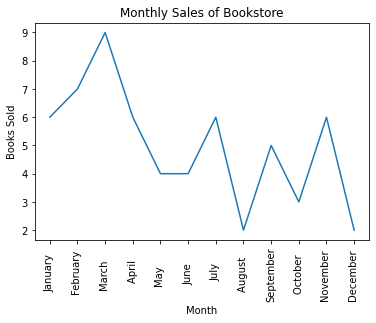

In [24]:
# Question 4: Which month has the most number of purchases?
# Aggegrate Function: COUNT()
conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()

retrieve_data = '''SELECT MONTH_OF_PURCHASE, COUNT(PURCHASE_ID) FROM Order_T
GROUP BY MONTH_OF_PURCHASE
ORDER BY COUNT(PURCHASE_ID) DESC
LIMIT 1'''

cursor.execute(retrieve_data)
result = cursor.fetchall()
for row in result:
    print('The month with the most purchases is', row[0].replace(" ",""), "with", row[1], "number of purchases.")

###Line Graph###

MonthData = []

Month = '''SELECT MONTH_OF_PURCHASE, COUNT(*) FROM Order_T GROUP BY MONTH_OF_PURCHASE ORDER BY AVG(MONTH_NUMBER) asc'''
NumberofPurchases = '''SELECT Purchase_ID FROM Order_T'''


PurchaseCount = []
MonthData = []

cursor.execute(Month)
for i in cursor:
    PurchaseCount.append(i[1])

cursor.execute(Month)
for i in cursor:
    MonthData.append(i[0])



plt.plot(MonthData,PurchaseCount)
plt.title("Monthly Sales of Bookstore")
plt.xlabel("Month")
plt.ylabel("Books Sold")
plt.xticks(MonthData[::1],  rotation='vertical')
plt.show()

conn.commit()
conn.close()

In [25]:

# Question 5: What books does the bookstore have?
conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()

retrieve_data = '''SELECT DISTINCT BOOK_TITLE FROM BOOKS'''

cursor.execute(retrieve_data)
uniquebooks = []

for row in cursor:
    uniquebooks.append(row[0])

for i in range(len(uniquebooks)):
    uniquebooks[i] = uniquebooks[i].replace("  ","")

print("The bookstore offers these books:",uniquebooks)
    

conn.commit()
conn.close()

The bookstore offers these books: ['Pride and Prejudice ', 'Fifty Shades of Grey', 'Harry Potter', 'Twilight', 'Spirit Mage ', 'The Lost Symbol ', 'Hunger Games', 'DaVinci Code']


The employee with the most sales revenue is Kody Blackburn .


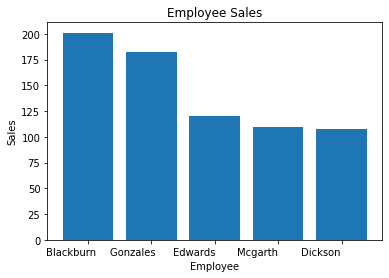

In [26]:

# Question 6: Which Employee has the highest sales revenue?
# Full Join

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')

cursor = conn.cursor()

retrieve_data = '''SELECT EMPLOYEE.FIRST_NAME, EMPLOYEE.LAST_NAME FROM EMPLOYEE
FULL JOIN Order_T on Order_T.EMPLOYEE_ID = EMPLOYEE.EMPLOYEE_ID
GROUP BY EMPLOYEE.FIRST_NAME, EMPLOYEE.LAST_NAME
ORDER BY SUM(Order_T.PURCHASE_AMOUNT) desc
LIMIT 1'''

cursor.execute(retrieve_data)
result = cursor.fetchall()
for row in result:
    print('The employee with the most sales revenue is', row[0].replace(" ",""),row[1].replace(" ",""),".")

###Bar Graph####
BarData1 = '''SELECT EMPLOYEE.FIRST_NAME, EMPLOYEE.LAST_NAME, SUM(ORDER_T.PURCHASE_AMOUNT) FROM EMPLOYEE
FULL JOIN Order_T on Order_T.EMPLOYEE_ID = EMPLOYEE.EMPLOYEE_ID
GROUP BY EMPLOYEE.FIRST_NAME, EMPLOYEE.LAST_NAME
ORDER BY SUM(Order_T.PURCHASE_AMOUNT) desc'''

employeelastname = []
sales = []

cursor.execute(BarData1)

for i in cursor:
    employeelastname.append(i[1])
    sales.append(i[2])


plt.bar(employeelastname,sales)
plt.title("Employee Sales")
plt.xlabel("Employee")
plt.ylabel("Sales")
plt.show()

conn.commit()
conn.close()

In [27]:

# Question 7: Give the employees tenured over a year a 10% raise
conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()

results1 = '''SELECT FIRST_NAME,LAST_NAME,YEARS_TENURED,HOURLY_PAY FROM EMPLOYEE ORDER BY EMPLOYEE_ID'''

cursor.execute(results1)

raises1 = cursor.fetchall()
print("Before: ")

for i in raises1:
    print(i)


retrieve_data = '''UPDATE EMPLOYEE
SET HOURLY_PAY = HOURLY_PAY * 1.1
WHERE YEARS_TENURED > 1
'''
cursor.execute(retrieve_data)


results2 = '''SELECT FIRST_NAME,LAST_NAME,YEARS_TENURED,HOURLY_PAY FROM EMPLOYEE ORDER BY EMPLOYEE_ID'''

cursor.execute(results2)

raises2 = cursor.fetchall()

print("After: ")

for i in raises2:
    print(i)


conn.commit()
conn.close()

Before: 
('Lexie               ', 'Dickson             ', 12, 27)
('Ibrahim             ', 'Edwards             ', 2, 15)
('Valentin            ', 'Gonzales            ', 1, 15)
('Jaidyn              ', 'Mcgarth             ', 4, 17)
('Kody                ', 'Blackburn           ', 7, 20)
After: 
('Lexie               ', 'Dickson             ', 12, 30)
('Ibrahim             ', 'Edwards             ', 2, 17)
('Valentin            ', 'Gonzales            ', 1, 15)
('Jaidyn              ', 'Mcgarth             ', 4, 19)
('Kody                ', 'Blackburn           ', 7, 22)


In [28]:
# Question 8
# What are the genres of books does the bookstore offer?

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()
retrieve_data = '''SELECT DISTINCT GENRE FROM BOOKS'''

cursor.execute(retrieve_data)


genres = []
for row in cursor:
    genres.append(row[0])

for i in range(len(genres)):
    genres[i] = genres[i].replace(" ","")

print("The genres of books are: ", genres)


conn.commit()
conn.close()

The genres of books are:  ['Romance', 'YoungAdult', 'Crime', 'Wizards']


The book with the most copies sold is: ['DaVinci Code']


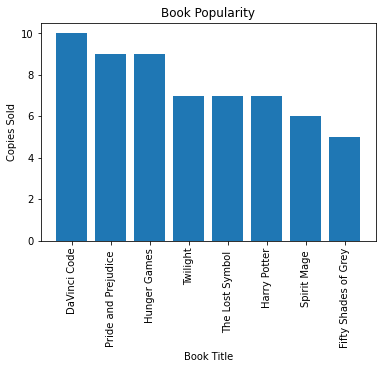

In [29]:
#Question 9: What book has sold the most copies?
# Full Join

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()

retrieve_data = '''SELECT BOOKS.BOOK_TITLE FROM BOOKS
    FULL JOIN Order_T on Order_T.BOOK_ID = BOOKS.BOOK_ID
    GROUP BY BOOKS.BOOK_TITLE
    ORDER BY COUNT(Order_T.PURCHASE_AMOUNT) desc
    LIMIT 1'''

cursor.execute(retrieve_data)
result = cursor.fetchall()

book = []

for i in result:
    book.append(i[0])

for i in range(len(book)):
    book[i] = book[i].replace("  ","")


print('The book with the most copies sold is:', book)


###Bar Chart###

BarData = '''SELECT BOOKS.BOOK_TITLE, COUNT(ORDER_T.PURCHASE_AMOUNT) FROM BOOKS
FULL JOIN Order_T on Order_T.BOOK_ID = BOOKS.BOOK_ID
GROUP BY BOOKS.BOOK_TITLE
ORDER BY COUNT(Order_T.PURCHASE_AMOUNT) desc
'''

BookTitle = []
CopiesSold = []

cursor.execute(BarData)

for i in cursor:
    BookTitle.append(i[0])
    CopiesSold.append(i[1])

for i in range(len(BookTitle)):
    BookTitle[i] = BookTitle[i].replace("  ", "")

plt.bar(BookTitle,CopiesSold)
plt.title("Book Popularity")
plt.xlabel("Book Title")
plt.ylabel("Copies Sold")
plt.xticks(BookTitle[::1],  rotation='vertical')
plt.show()



conn.commit()
conn.close()

In [30]:
#Question 10: What type of employee positions does this bookstore have?

conn = psycopg2.connect(database = 'bookstore', user = 'postgres', password = '1234', host = 'localhost', port = '5432')


cursor = conn.cursor()

retrieve_data = '''SELECT DISTINCT ROLE FROM EMPLOYEE'''

results = cursor.execute(retrieve_data)

roles = []
for row in cursor:
    roles.append(row[0])

for i in range(len(roles)):
    roles[i] = roles[i].replace(" ","")
    
print("The roles at the bookstore are: ",roles)


conn.commit()
conn.close()

The roles at the bookstore are:  ['Stocker', 'Manager', 'Cashier']
